In [34]:
import pandas as pd
file_path = '/Users/anmarabdi/Documents/GitHub/HackDiversityDataInterviewChallenge/inclusive_features_usage.csv'
df = pd.read_csv(file_path)
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


## Cleaning

In [35]:
empty = df.isna().sum()
empty

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64

In [36]:
len(df)

10000

In [37]:
df.fillna("Unknown", inplace=True)

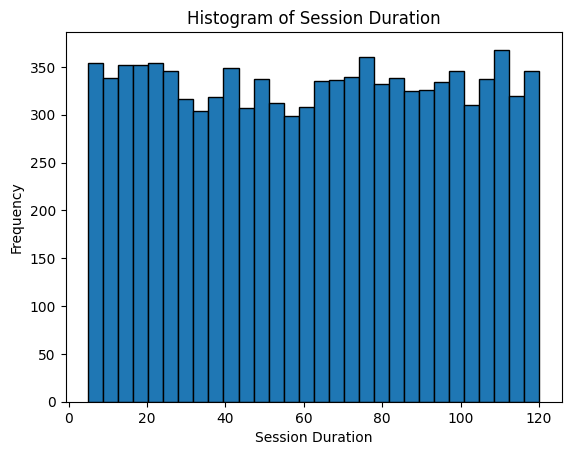

In [38]:
import matplotlib.pyplot as plt
plt.hist(df['session_duration'], bins=30, edgecolor='k')
plt.title('Histogram of Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.show()

In [39]:
# ID outliers using mean + std dev
def find_outliers_mean_std(data, column, threshold=2):  # 2 std deviations ~ 95%
    mean = data[column].mean()
    std_dev = data[column].std()
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

session_duration_outliers = find_outliers_mean_std(df, 'session_duration')
engagement_score_outliers = find_outliers_mean_std(df, 'engagement_score')

session_duration_outliers, engagement_score_outliers

(Empty DataFrame
 Columns: [user_id, feature_used, session_duration, engagement_score, accessibility_settings, age_group, gender, additional_attributes]
 Index: [],
 Empty DataFrame
 Columns: [user_id, feature_used, session_duration, engagement_score, accessibility_settings, age_group, gender, additional_attributes]
 Index: [])

In [40]:
# Using 1 for true and 0 for false for easier model interpretability later when doing predictive modeling.
df['high_accessibility_user'] = (df['accessibility_settings'] >= 3).astype(int)
df

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,1
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Unknown,1
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Unknown,0
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,0
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Unknown,0
...,...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Unknown,1
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,Unknown,0
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,Unknown,0
9998,user_8014,Multilingual,19.23,3,1,Professional,Unknown,LGBTQ+,0


In [41]:
df['demographic_summary'] = df['age_group'] + ' - ' + df['gender'] + ' - ' + df['additional_attributes']
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user,demographic_summary
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,1,Teenager - Unknown - LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Unknown,1,Professional - Non-Binary - Unknown
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Unknown,0,Adult - Female - Unknown
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,0,Adult - Unknown - LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Unknown,0,Young Adult - Male - Unknown


There were only missing values in 'gender' and 'additional_attributes' which made it confusing due to the instructions implying there would be missing values in the numerical columns. Data was normally distributed which led to finding no outliers after looking within 2 standard deviations from the mean (95% of the data). The unknown values in the categorical attributes led to a large amount of 'demographic_summary' variations which made further analysis a little messy.

## EDA

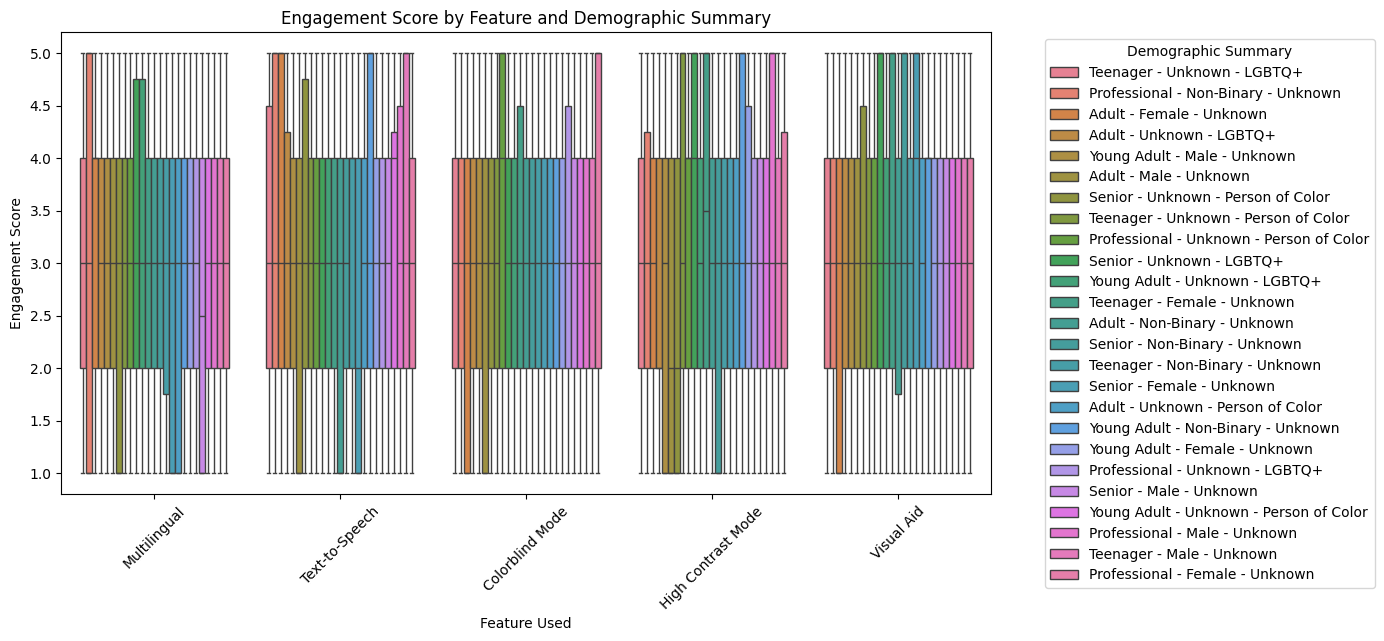

In [42]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='feature_used', y='engagement_score', hue='demographic_summary')
plt.title('Engagement Score by Feature and Demographic Summary')
plt.xlabel('Feature Used')
plt.ylabel('Engagement Score')
plt.legend(title='Demographic Summary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [29]:
# too crowded to use demographic_summary so i'll split by broader categories

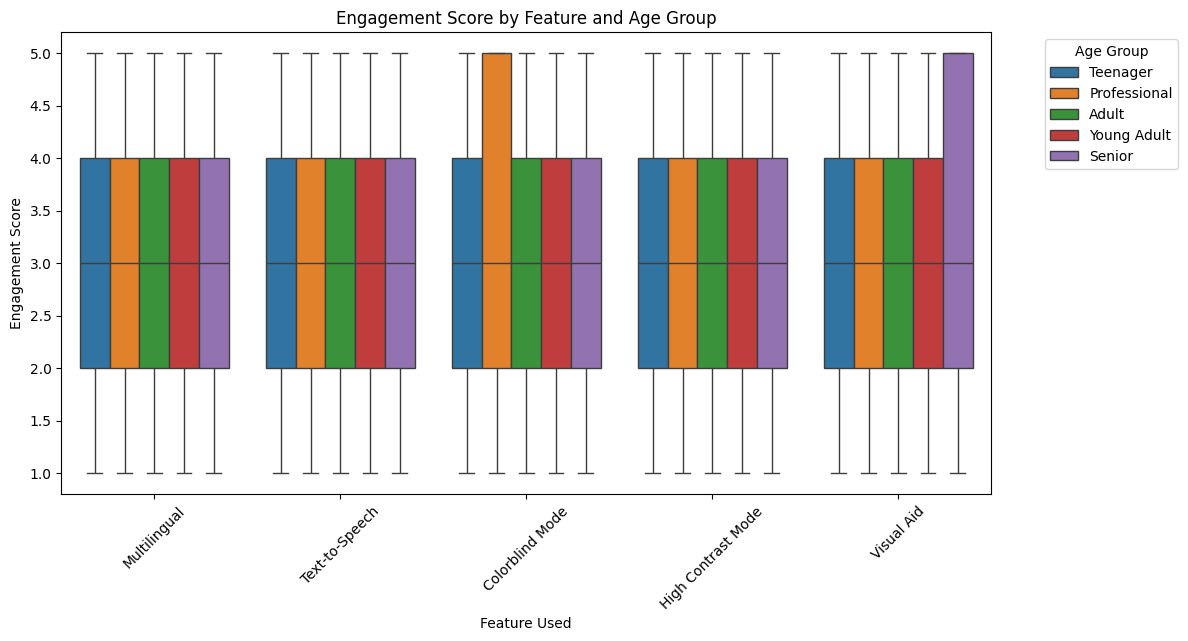

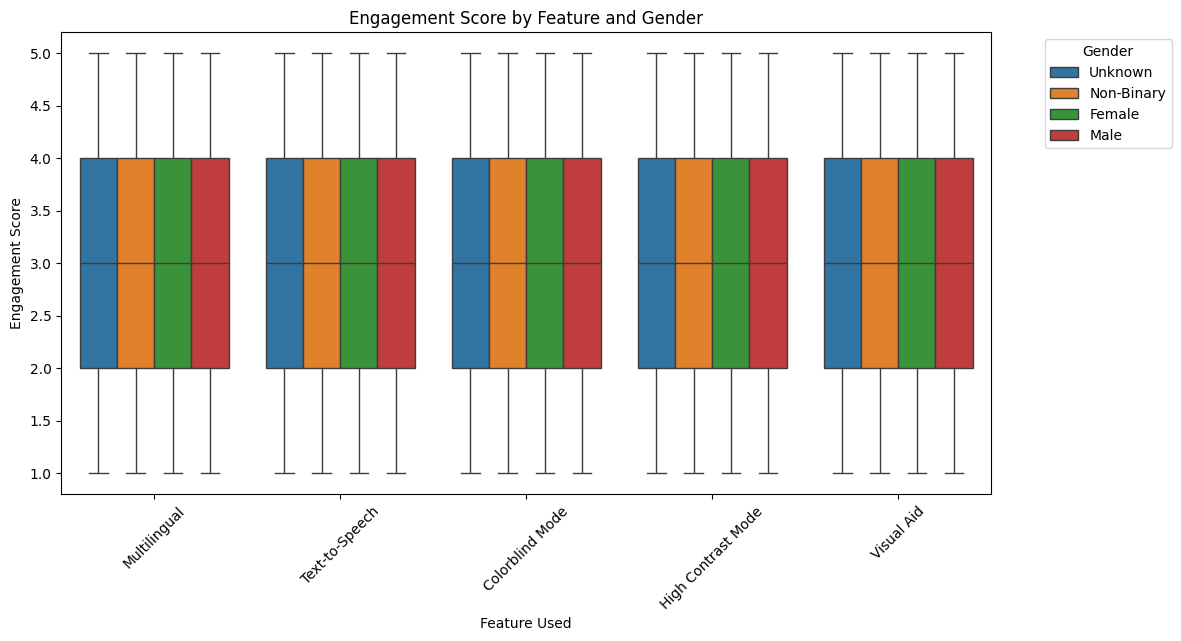

In [43]:
#age group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='feature_used', y='engagement_score', hue='age_group')
plt.title('Engagement Score by Feature and Age Group')
plt.xlabel('Feature Used')
plt.ylabel('Engagement Score')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='feature_used', y='engagement_score', hue='gender')
plt.title('Engagement Score by Feature and Gender')
plt.xlabel('Feature Used')
plt.ylabel('Engagement Score')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


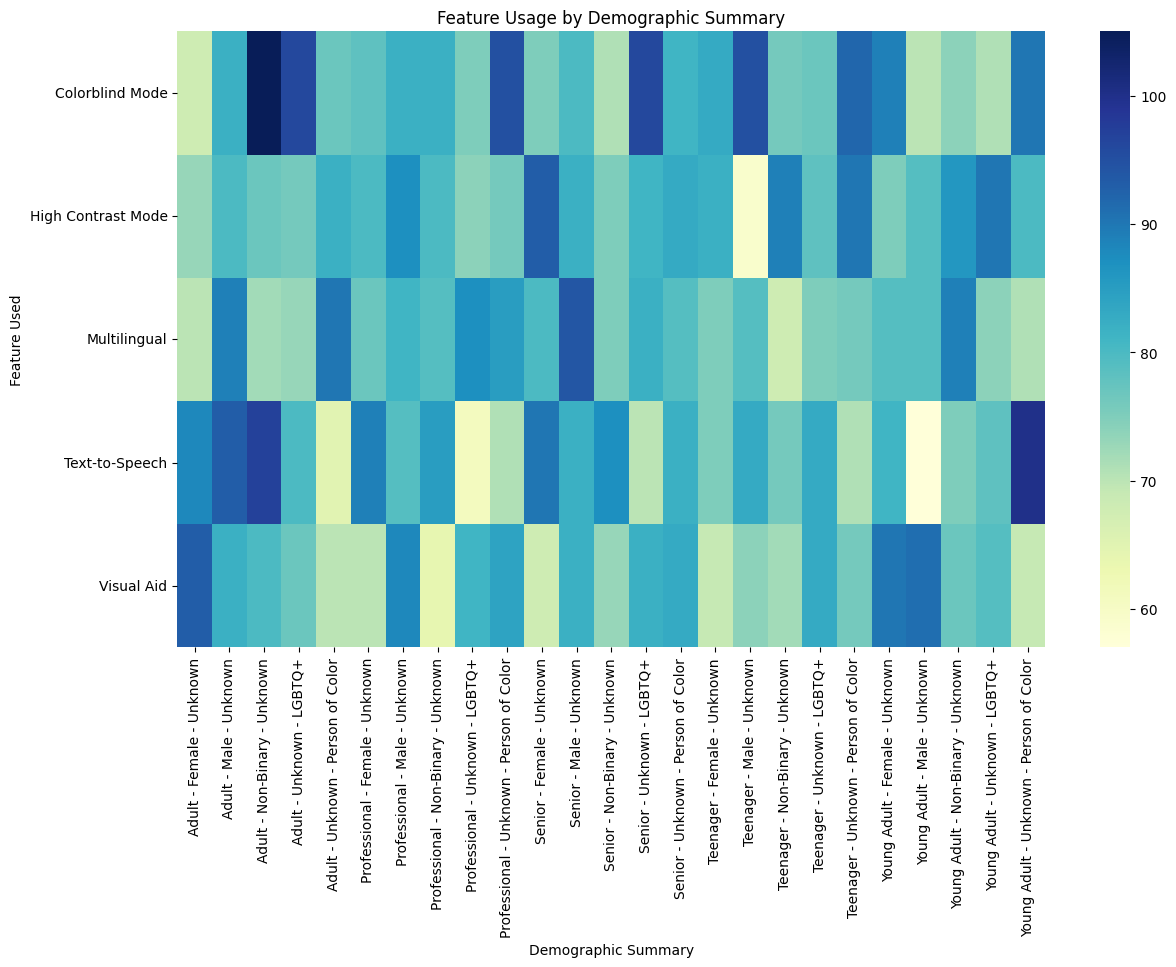

In [32]:
feature_usage_by_demographic = df.groupby(['feature_used', 'demographic_summary']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(feature_usage_by_demographic, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Feature Usage by Demographic Summary')
plt.xlabel('Demographic Summary')
plt.ylabel('Feature Used')
plt.xticks(rotation=90)
plt.show()

Tried plotting with the 'demographic_summary' at first but was too messy so I split into gender and age group. This led to relatively flat boxplots that didnt give much insight. So I moved to a heatmap using 'demographic_summary' and this was more helpful.

## Feature Eng + Predictive model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df['avg_session_duration_per_feature'] = df.groupby('feature_used')['session_duration'].transform('mean')
df['avg_engagement_by_accessibility'] = df.groupby(['accessibility_settings', 'age_group', 'gender'])['engagement_score'].transform('mean')

In [46]:
label_encoders = {}
for column in ['age_group', 'gender', 'additional_attributes', 'feature_used']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

X = df[['age_group', 'gender', 'additional_attributes', 'engagement_score', 'feature_used', 
        'avg_session_duration_per_feature', 'avg_engagement_by_accessibility']]
y = df['high_accessibility_user'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1012
           1       0.64      0.63      0.64       988

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



In [47]:
# 64% accuracy on this model so lets try decision tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_report = classification_report(y_test, y_pred_tree)

print(tree_report)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1012
           1       0.73      0.74      0.73       988

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [50]:
# improved to 73%

Started by engineering features like average session duration per feature and average engagement score by accessibility settings and demographics. Tried logistic regression first and got a low score of 64% accuracy then got a 9% jump when switched to decision tree.
Could reach higher accuracy with further feature engineering or cross validation.